In [1]:
%load_ext autoreload
%autoreload 2

In [34]:
import sys
sys.path.append('../src')

import matplotlib.pyplot as plt
import itertools
import random
import numpy as np

In [3]:
import util
from uscode import USCode
from citation_network import CitationNetwork
from cluster import Clustering, vectorization_distance, CitationSinks

In [4]:
usc = USCode.from_json('../data/usc201909.json')
print(len(usc.titles()))

53


In [5]:
cn = CitationNetwork(usc)
print(len(cn.nodes))

64175


In [26]:
title_ids = ['t17', 't32', 't39']
section_lists = [list(usc.title(t).sections()) for t in title_ids]

for sections in section_lists:
    print(len(sections))

142
75
174


In [27]:
def print_num_of_sinks(sections):
    for sec in itertools.islice(sections, 5):
        print('{}: {} sinks'.format(sec.id, len(cn.sinks_from(sec.id))))
    print()

for sections in section_lists:
    print_num_of_sinks(sections)

t17/s101: 4920 sinks
t17/s102: 4921 sinks
t17/s103: 0 sinks
t17/s104: 4920 sinks
t17/s104A: 4920 sinks

t32/s101: 4920 sinks
t32/s102: 0 sinks
t32/s103: 0 sinks
t32/s104: 4920 sinks
t32/s105: 0 sinks

t39/s101: 4920 sinks
t39/s102: 4920 sinks
t39/s201: 4920 sinks
t39/s202: 4920 sinks
t39/s203: 4920 sinks



In [ ]:
# def print_clusters(clusters):
#     print('\n\n'.join('#{}: {}'.format(i, str(c)) for i, c in enumerate(clusters)))

# n_clusters = 5

# print("Vectorization Clustering:")
# print_clusters(vectorization_clustering.get_clusters(n_clusters))

# print('\n\n')
# print("Citation Clustering:")
# print_clusters(citation_clustering.get_clusters(n_clusters))

In [75]:
def show_dendrogram(sections):
    vectorization_clustering = Clustering(sections, vectorization_distance)
    citation_clustering = Clustering(sections, CitationSinks(sections, cn).distance)

    plt.figure(figsize=(16, 12))
    vectorization_clustering.plot_dendrogram()

    plt.figure(figsize=(16, 12))
    citation_clustering.plot_dendrogram()

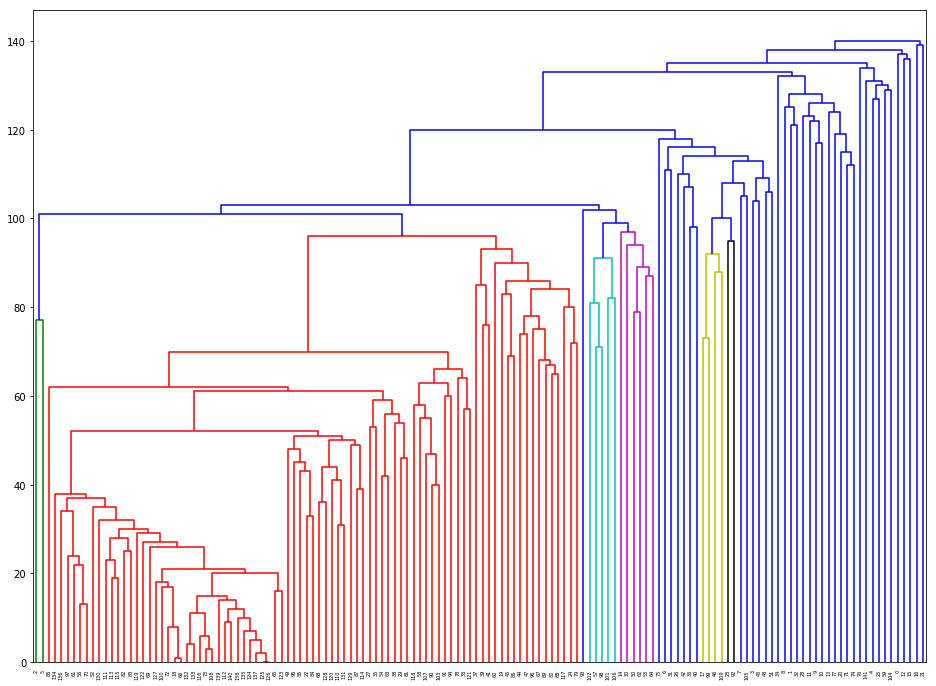

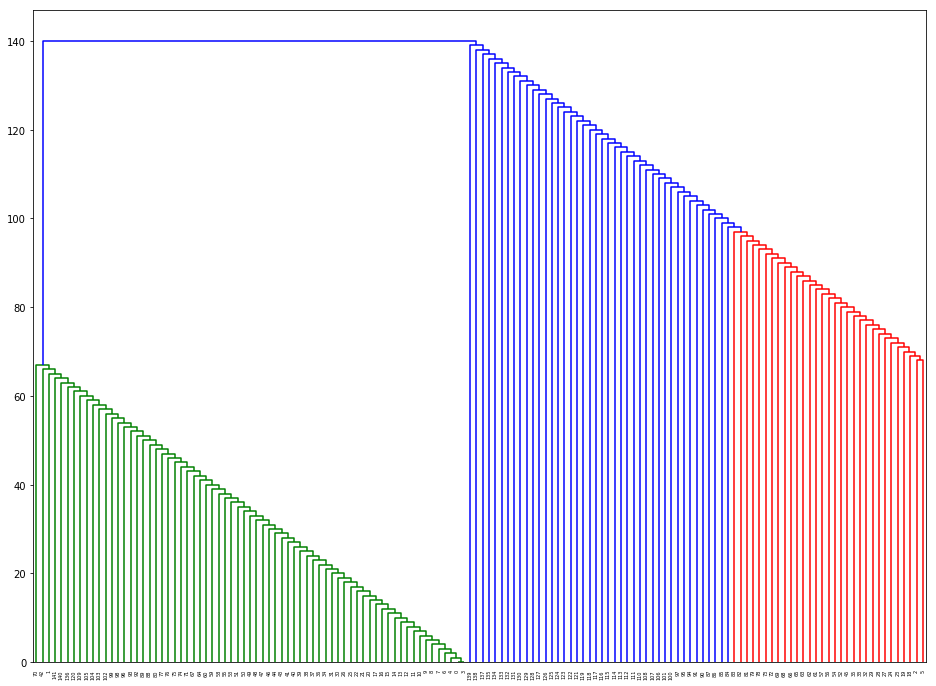

In [76]:
show_dendrogram(section_lists[0])

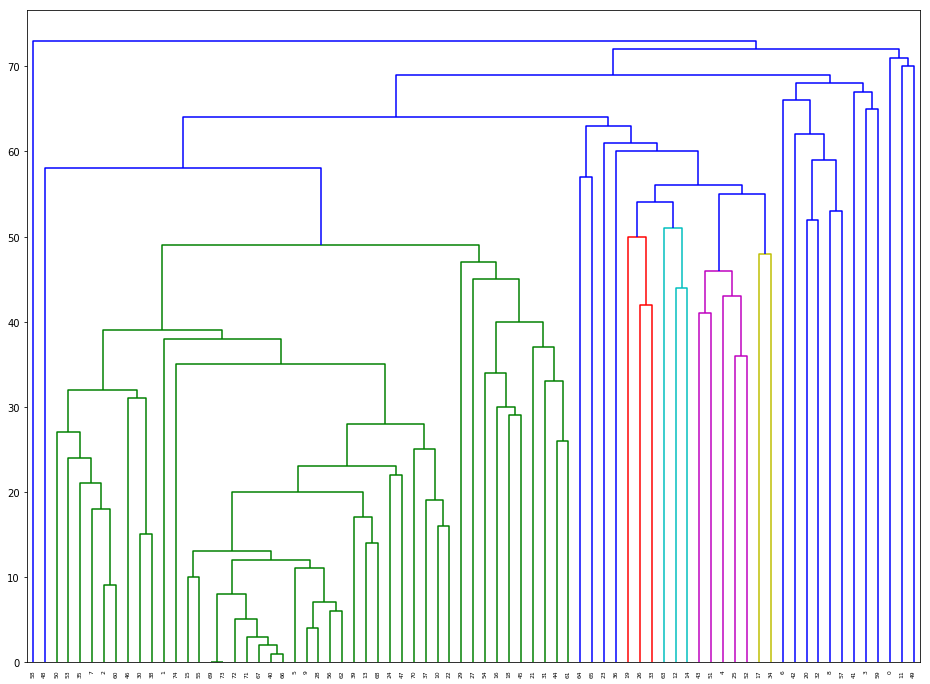

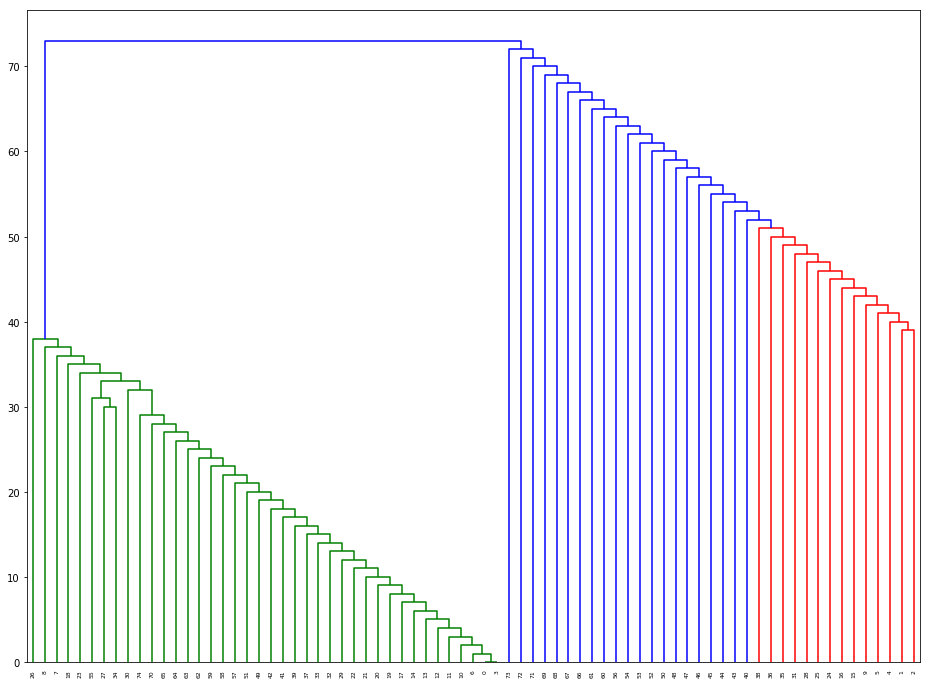

In [77]:
show_dendrogram(section_lists[1])

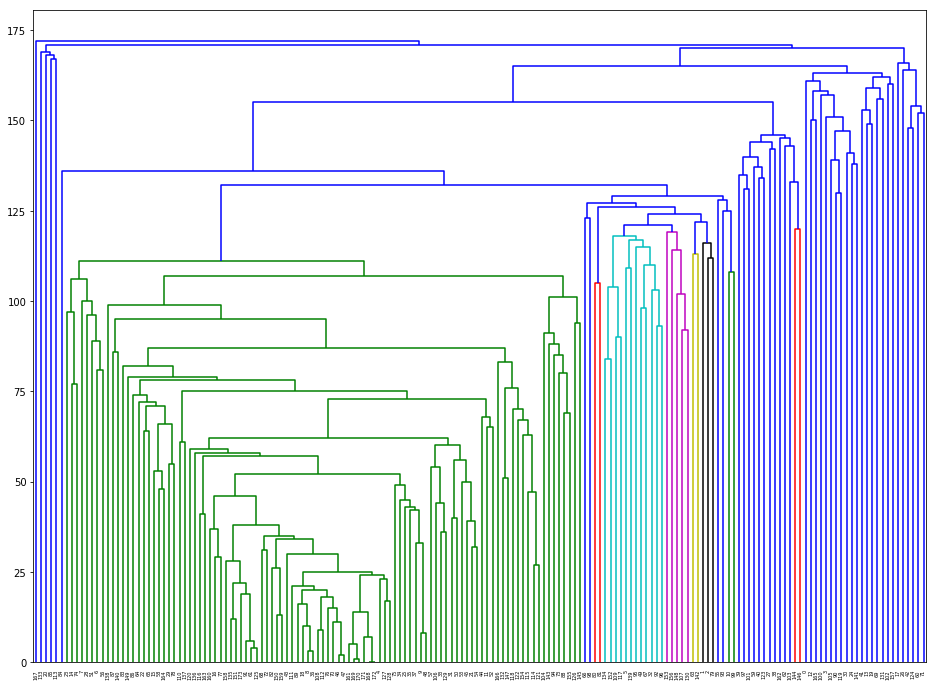

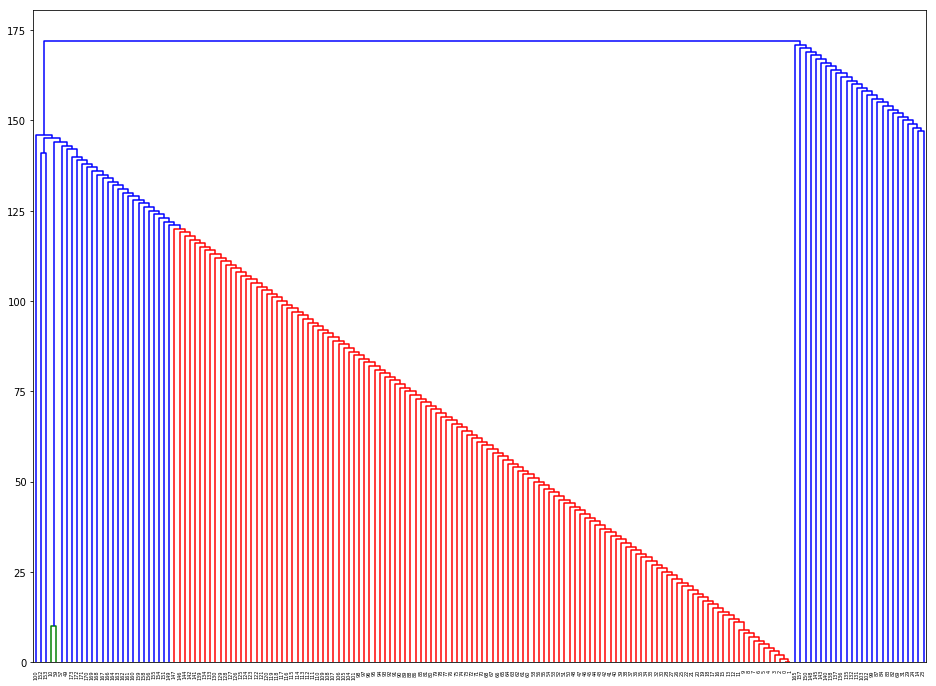

In [78]:
show_dendrogram(section_lists[2])